In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data 

In [ ]:
from google.colab import drive

In [ ]:
drive = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('//content/drive/MyDrive/Datascience_data/Iris_spark.csv')

In [ ]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data = data.drop(columns= ['Id'])    #delete a column



In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()                 # display stat of data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# To display basic info about data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# To display number of samplese in each class
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Preprocessing of dataset

In [ ]:
# Chk null values in data
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory data analysis

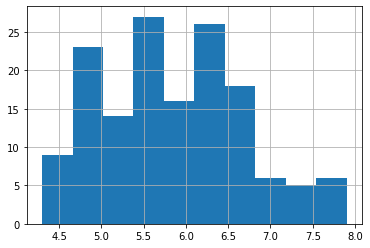

In [ ]:
# Histograms
data['SepalLengthCm'].hist()

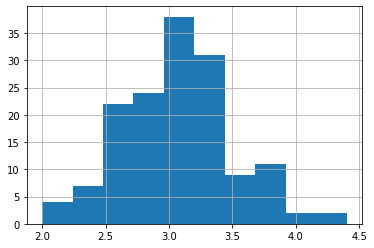

In [ ]:
data['SepalWidthCm'].hist()

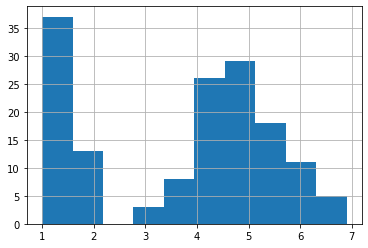

In [ ]:
data['PetalLengthCm'].hist()

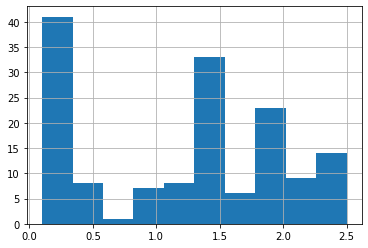

In [ ]:
data['PetalWidthCm'].hist()

In [ ]:
# Scatterplot
colors=['red','orange','red']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


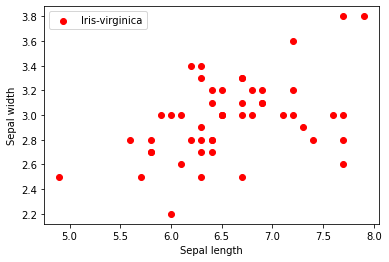

In [ ]:
for i in range(3):
    x=data[data['Species'] == species[i]]
plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = colors[i], label= species[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend()

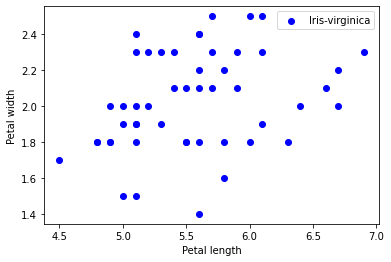

In [ ]:
for i in range(3):
    x = data[data['Species'] == species[i]]
plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label= species[i])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend()


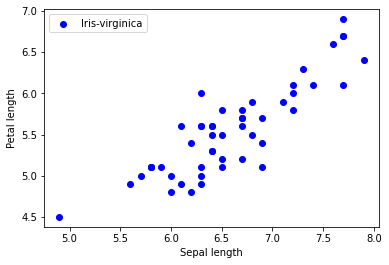

In [ ]:
for i in range(3):
    x = data[data['Species'] == species[i]]
plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c = colors[i], label= species[i])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend()

Correlation

In [ ]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [ ]:
corr= data.corr()

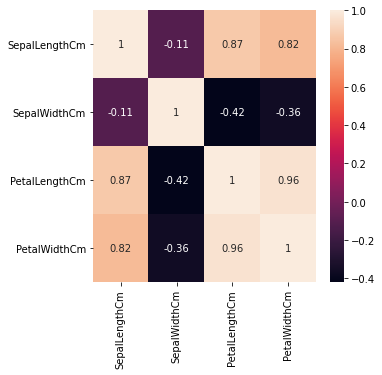

In [ ]:
fig, axis =plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax=axis)

Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['Species'] = le.fit_transform(data['Species'])

In [ ]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Model Training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop(columns=['Species'])

In [ ]:
y = data['Species']

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Model = DecisionTreeClassifier()

In [ ]:
Model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred= Model.predict(x_test)

In [ ]:
y_test.head()

80     1
56     1
9      0
71     1
110    2
Name: Species, dtype: int64

In [ ]:
y_pred[0:5]

array([1, 1, 0, 1, 2])

In [ ]:
print("Accuracy of Model is ", Model.score(x_test,y_test)*100)

Accuracy of Model is  95.55555555555556
